In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IA.utils import mapping, parameter_range
from scipy import stats
from pathlib import Path
import math
import swifter
from sklearn import metrics

In [40]:
!ls -lah analysis/not_uploaded/IA2NIMA/AVA/

total 78M
drwxr-xr-x 2 janpf janpf 4.0K Nov 11 22:40 .
drwxr-xr-x 3 janpf janpf 4.0K Nov 11 18:07 ..
-rw-r--r-- 1 janpf janpf 2.8M Nov 11 22:40 .scratch.ckpts.IA2NIMA.AVA.None.change_regress.epoch-0.pth.txt
-rw-r--r-- 1 janpf janpf 2.8M Nov 11 22:40 .scratch.ckpts.IA2NIMA.AVA.None.change_regress.epoch-149.pth.txt
-rw-r--r-- 1 janpf janpf 2.8M Nov 11 22:40 .scratch.ckpts.IA2NIMA.AVA.None.change_regress.epoch-21.pth.txt
-rw-r--r-- 1 janpf janpf 2.8M Nov 11 22:40 .scratch.ckpts.IA2NIMA.AVA.None.change_regress.epoch-22.pth.txt
-rw-r--r-- 1 janpf janpf 2.8M Nov 11 22:40 .scratch.ckpts.IA2NIMA.AVA.imagenet.epoch-0.pth.txt
-rw-r--r-- 1 janpf janpf 2.8M Nov 11 22:38 .scratch.ckpts.IA2NIMA.AVA.imagenet.epoch-14.pth.txt
-rw-r--r-- 1 janpf janpf 2.8M Nov 11 22:40 .scratch.ckpts.IA2NIMA.AVA.imagenet.epoch-149.pth.txt
-rw-r--r-- 1 janpf janpf 2.8M Nov 11 22:39 .scratch.ckpts.IA2NIMA.AVA.imagenet.epoch-15.pth.txt
-rw-r--r-- 1 janpf janpf 2.8M Nov 11 22:40 .scratch.ckpts.IA2NIMA.AVA.one.change_class.

In [41]:
df_l = []
for p in Path("analysis/not_uploaded/IA2NIMA/AVA/").iterdir():
    tmp = pd.read_csv(p)
    tmp["scores"] = tmp["scores"].swifter.apply(eval)
    tmp["score"] = tmp["scores"].swifter.apply(lambda row: sum([row[i] * (i+1) for i in range(len(row))]))
    tmp["img"] = tmp["img"].swifter.apply(lambda row: row.split(".")[0])
    tmp["quality"] = tmp["score"].apply(lambda row: 1 if row > 5 else 0)
    tmp["quality"] = tmp["quality"].astype(int)
    tmp["img"] = tmp["img"].astype(int)

    tmp.drop(columns=["scores"], inplace=True)
    tmp = tmp.rename(columns={"score":"score_" + p.stem.split("AVA.")[1], "quality": "quality_" + p.stem.split("AVA.")[1]})

    tmp = tmp.set_index("img")
    df_l.append(tmp)

df = df_l[0].join(df_l[1:])

Pandas Apply: 100%|██████████| 12818/12818 [00:00<00:00, 563442.84it/s]


In [42]:
gt = pd.read_csv("analysis/not_uploaded/AVA_gt.txt", sep=" ").drop(columns=["Unnamed: 0", "semanticTagID1", "semanticTagID2", "challengeID"])

In [43]:
gt["votes"] = gt.apply(lambda row: sum(list(row)[1:]), axis=1)
gt["gt_score"] = gt.apply(lambda row: sum([val * (i + 1) for i, val in enumerate(list(row)[1:-1])]), axis=1)
gt["gt_score"] = gt.apply(lambda row: row.gt_score / row.votes, axis=1)
gt["gt_quality"] = gt["gt_score"].swifter.apply(lambda row: 1 if row > 5 else 0)
gt["img"] = gt["img"].astype(int)

gt = gt[["img","gt_score", "gt_quality"]]
gt = gt.set_index("img")

Pandas Apply: 100%|██████████| 255530/255530 [00:00<00:00, 928128.67it/s] 


In [44]:
df = gt.join(df).dropna().drop_duplicates()
df

,gt_score,gt_quality,score_one.change_class.epoch-0.pth,quality_one.change_class.epoch-0.pth,score_one.change_class.epoch-149.pth,quality_one.change_class.epoch-149.pth,score_None.change_regress.epoch-21.pth,quality_None.change_regress.epoch-21.pth,score_three.change_class.epoch-13.pth,quality_three.change_class.epoch-13.pth,...,score_None.change_regress.epoch-0.pth,quality_None.change_regress.epoch-0.pth,score_one.change_class.epoch-19.pth,quality_one.change_class.epoch-19.pth,score_imagenet.epoch-14.pth,quality_imagenet.epoch-14.pth,score_three.epoch-14.pth,quality_three.epoch-14.pth,score_one.epoch-0.pth,quality_one.epoch-0.pth
img,,,,,,,,,,,,,,,,,,,,,
953844,5.914062,1,5.435197,1.0,5.457176,1.0,5.498982,1.0,5.563633,1.0,...,5.511621,1.0,5.420652,1.0,5.318886,1.0,5.521613,1.0,5.396214,1.0
953283,6.755556,1,5.493105,1.0,5.857566,1.0,5.449551,1.0,5.553705,1.0,...,5.464446,1.0,5.479660,1.0,5.650019,1.0,5.477555,1.0,5.381501,1.0
954116,5.541985,1,4.604829,0.0,4.431028,0.0,4.542896,0.0,4.499246,0.0,...,4.773244,0.0,4.473223,0.0,4.955961,0.0,4.839361,0.0,4.614480,0.0
953780,5.041667,1,5.636556,1.0,5.670701,1.0,5.556524,1.0,5.704007,1.0,...,5.538978,1.0,5.699583,1.0,5.578553,1.0,5.528334,1.0,5.553999,1.0
953582,5.943548,1,5.491844,1.0,5.841414,1.0,5.420136,1.0,5.635291,1.0,...,5.399803,1.0,5.481449,1.0,5.501658,1.0,5.451525,1.0,5.452984,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870778,5.722467,1,5.435381,1.0,5.764147,1.0,5.348412,1.0,5.495775,1.0,...,5.331624,1.0,5.466403,1.0,5.449655,1.0,5.432651,1.0,5.376922,1.0
869976,5.199115,1,5.291705,1.0,5.458912,1.0,5.303173,1.0,5.342050,1.0,...,5.259165,1.0,5.301169,1.0,5.287876,1.0,5.289424,1.0,5.417442,1.0
57275,6.492248,1,5.299766,1.0,5.581259,1.0,5.400688,1.0,5.426782,1.0,...,5.393269,1.0,5.275638,1.0,5.504054,1.0,5.297915,1.0,5.332044,1.0


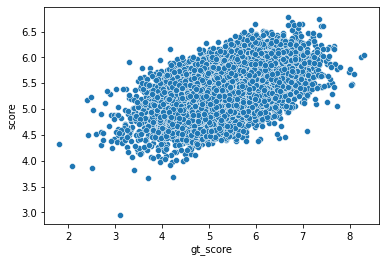

In [71]:
sns.scatterplot(data=df, x="gt_score", y="score")

In [45]:
for score in sorted(df.columns):
    if "gt" in score or not "score" in score:
        continue
    if "epoch-0" in score:
        print(score)
        print("LCC :", stats.pearsonr(df["gt_score"], df[score])[0])
        print("SRCC:", stats.spearmanr(df["gt_score"], df[score])[0])
        print("ACC :", metrics.accuracy_score(df["gt_quality"], df[score.replace("score", "quality")]))

score_None.change_regress.epoch-0.pth
LCC : 0.3849882430105106
SRCC: 0.3726759703852357
ACC : 0.7104072398190046
score_imagenet.epoch-0.pth
LCC : 0.4201242495100065
SRCC: 0.4052444145004332
ACC : 0.7103292245280075
score_one.change_class.epoch-0.pth
LCC : 0.3814452323023531
SRCC: 0.3679459783517518
ACC : 0.7157902948978
score_one.change_regress.epoch-0.pth
LCC : 0.3647101370511038
SRCC: 0.3542329630869461
ACC : 0.7090809798720549
score_one.epoch-0.pth
LCC : 0.38264699465973656
SRCC: 0.37114514538500637
ACC : 0.7104072398190046
score_three.change_class.epoch-0.pth
LCC : 0.3804607068870273
SRCC: 0.366337496645488
ACC : 0.7156342643158059
score_three.epoch-0.pth
LCC : 0.3759446924376585
SRCC: 0.3637605783888563
ACC : 0.7095490716180372


In [47]:
for score in sorted(df.columns):
    if "gt" in score or not "score" in score:
        continue
    if "epoch-149" in score:
        print(score)
        print("LCC :", stats.pearsonr(df["gt_score"], df[score])[0])
        print("SRCC:", stats.spearmanr(df["gt_score"], df[score])[0])
        print("ACC :", metrics.accuracy_score(df["gt_quality"], df[score.replace("score", "quality")]))

score_None.change_regress.epoch-149.pth
LCC : 0.5540258828968079
SRCC: 0.5419693787297942
ACC : 0.7548759556873147
score_imagenet.epoch-149.pth
LCC : 0.5490840432277029
SRCC: 0.537131804655928
ACC : 0.7542518333593384
score_one.change_class.epoch-149.pth
LCC : 0.5538765170760429
SRCC: 0.5412968490686533
ACC : 0.7539397721953502
score_one.change_regress.epoch-149.pth
LCC : 0.5545302719430375
SRCC: 0.5424093373503757
ACC : 0.7572164144172258
score_one.epoch-149.pth
LCC : 0.553627960621008
SRCC: 0.5414200897224664
ACC : 0.7550319862693088
score_three.change_class.epoch-149.pth
LCC : 0.5538278238103207
SRCC: 0.5411157101227089
ACC : 0.7557341238882821
score_three.epoch-149.pth
LCC : 0.5540925718421347
SRCC: 0.5415542241074812
ACC : 0.7569043532532377


In [49]:
for score in sorted(df.columns):
    if "gt" in score or not "score" in score:
        continue
    if "epoch-0" in score or "epoch-149" in score:
        continue 
    print(score)
    print("LCC :", stats.pearsonr(df["gt_score"], df[score])[0])
    print("SRCC:", stats.spearmanr(df["gt_score"], df[score])[0])
    print("ACC :", metrics.accuracy_score(df["gt_quality"], df[score.replace("score", "quality")]))

score_None.change_regress.epoch-21.pth
LCC : 0.3927165157296927
SRCC: 0.38238714082757774
ACC : 0.7146980808238415
score_None.change_regress.epoch-22.pth
LCC : 0.4593958002528293
SRCC: 0.447930544039063
ACC : 0.7278046497113434
score_imagenet.epoch-14.pth
LCC : 0.4332790675010538
SRCC: 0.41701971390852466
ACC : 0.7206272429396162
score_imagenet.epoch-15.pth
LCC : 0.46399542225309515
SRCC: 0.45032750056824883
ACC : 0.7282727414573257
score_one.change_class.epoch-19.pth
LCC : 0.3844514600592459
SRCC: 0.3731118391483095
ACC : 0.7173506007177407
score_one.change_class.epoch-20.pth
LCC : 0.4153538860539153
SRCC: 0.40379109461164303
ACC : 0.7228116710875332
score_one.change_regress.epoch-18.pth
LCC : 0.37968760196702933
SRCC: 0.371030211612694
ACC : 0.7120455609299423
score_one.change_regress.epoch-19.pth
LCC : 0.4307310310342001
SRCC: 0.42168237277092924
ACC : 0.7192229677016695
score_one.epoch-12.pth
LCC : 0.39187970844023806
SRCC: 0.38240983995155814
ACC : 0.7127476985489156
score_one.epo